In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Rakamin DS/E Commerce Dataset.xlsx", sheet_name='E Comm')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1060,51061,0,16.0,Mobile Phone,1,21.0,Debit Card,Male,3.0,4,Grocery,3,Married,2,0,24.0,NaN,6.0,11.0,276.03
2023,52024,0,NaN,Phone,1,26.0,CC,Male,2.0,3,Mobile,3,Married,5,0,17.0,1.0,1.0,0.0,122.59
5310,55311,0,9.0,Mobile Phone,1,25.0,Debit Card,Male,3.0,2,Laptop & Accessory,5,Married,3,0,12.0,2.0,2.0,11.0,177.08
68,50069,0,NaN,Computer,1,13.0,CC,Male,2.0,2,Mobile,2,Married,5,0,14.0,0.0,2.0,2.0,120.89
2166,52167,0,22.0,Mobile Phone,3,14.0,Cash on Delivery,Male,2.0,4,Grocery,4,Married,7,0,17.0,1.0,2.0,NaN,231.20


## 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? </br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?</br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) </br>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Missing Values

Beberapa kolom yang memiliki nilai kosong antara lain = `Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder`

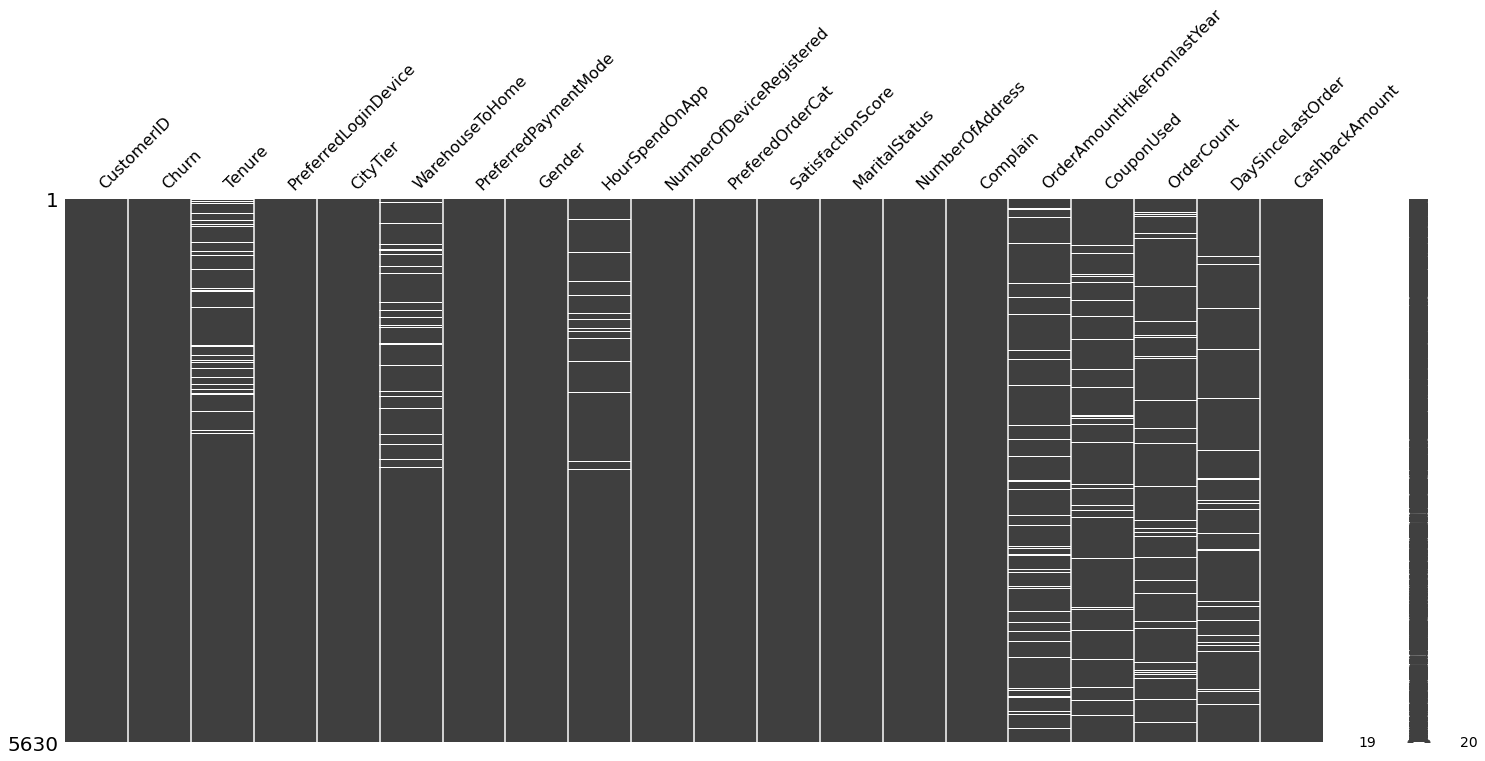

In [19]:
#Visualize missingness,
import missingno as msno
msno.matrix(df)
plt.show()

In [10]:
#pengelompokan
cats = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
nums = ['Churn','Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress'
            ,'Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [11]:
df[nums].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [15]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



## 2. Univariate Analysis

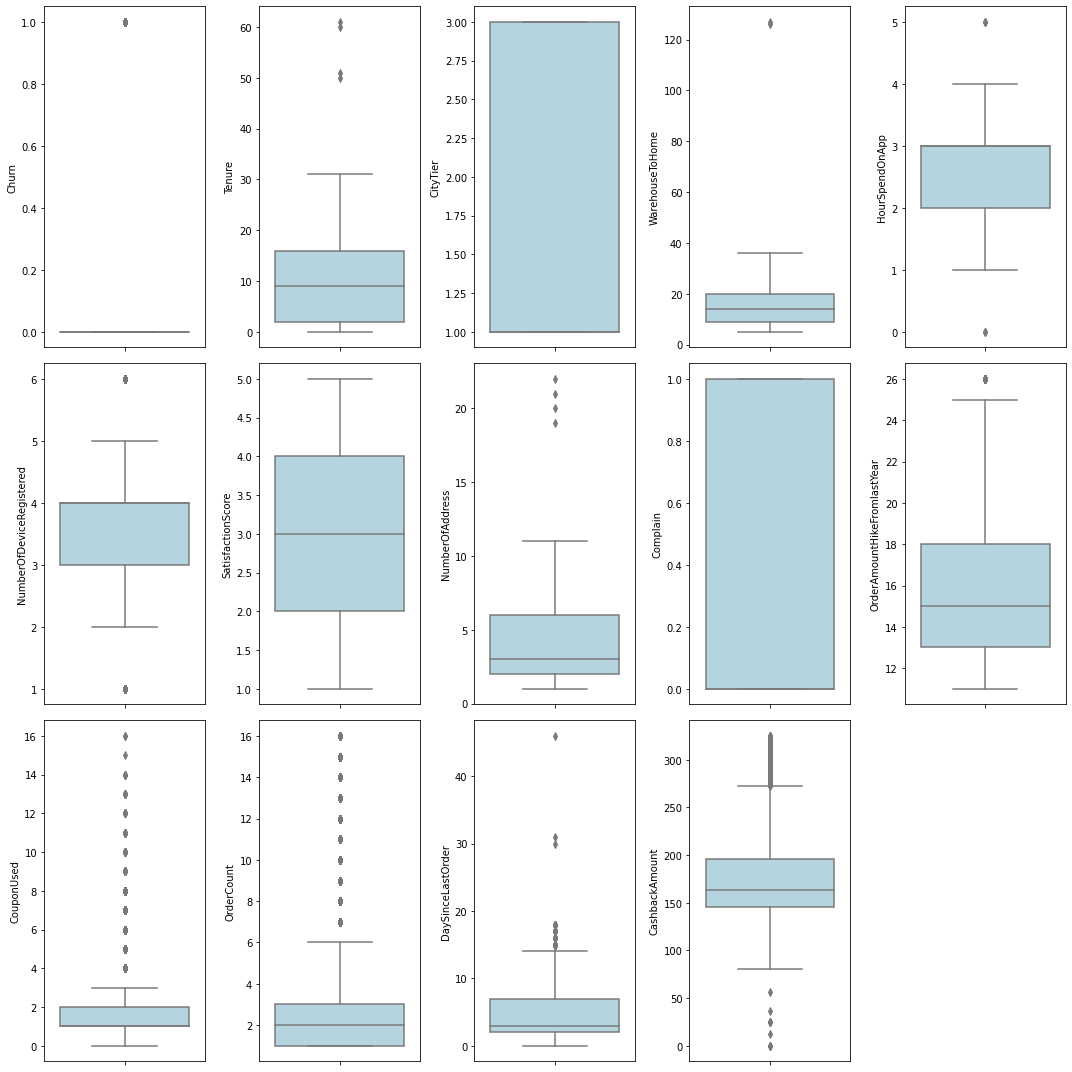

In [17]:
plt.figure(figsize=(15,15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='lightblue', orient='v')
    plt.tight_layout()

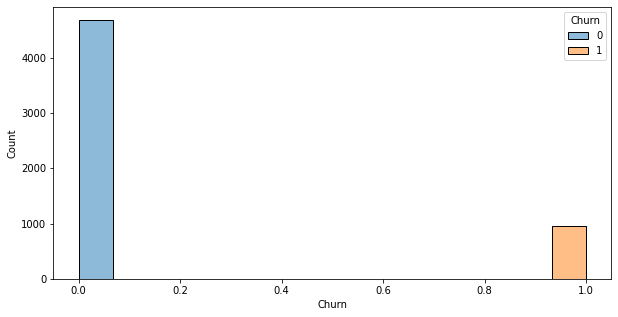

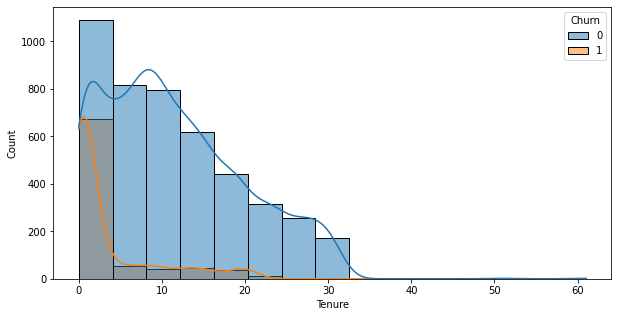

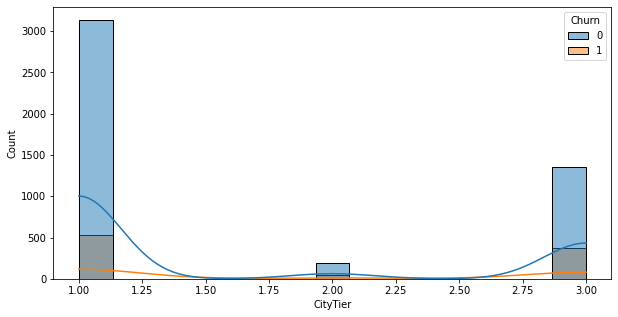

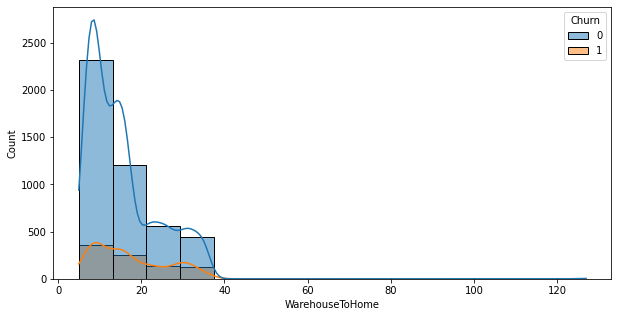

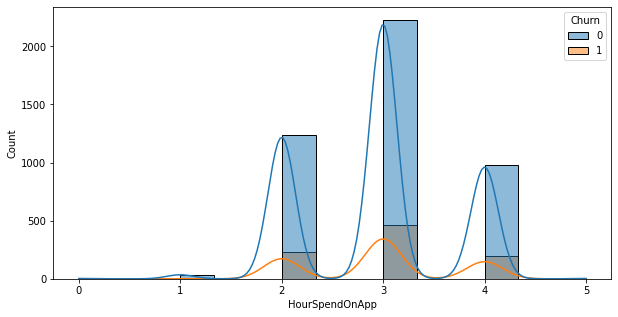

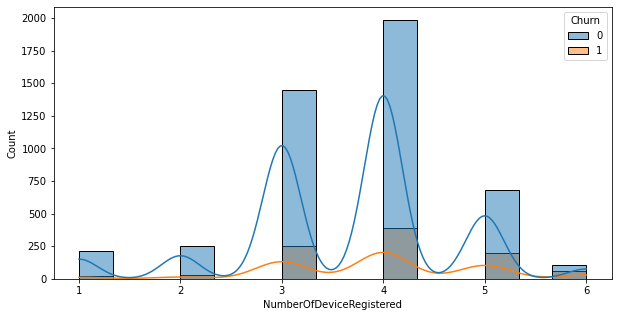

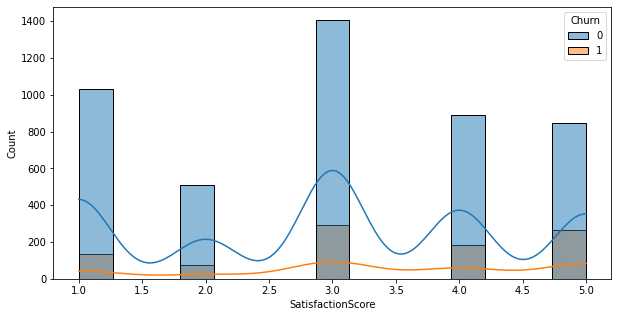

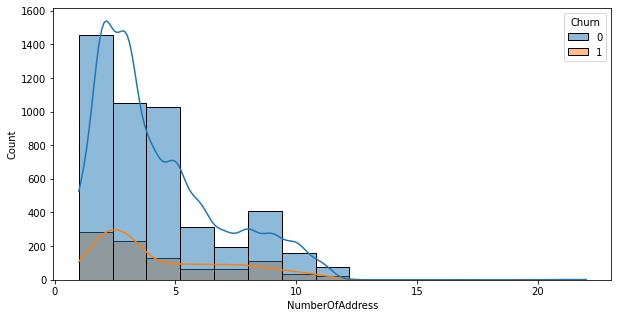

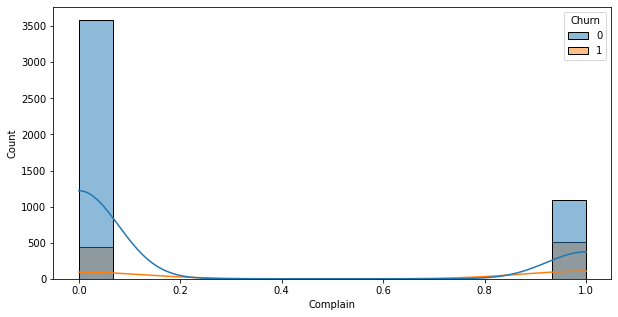

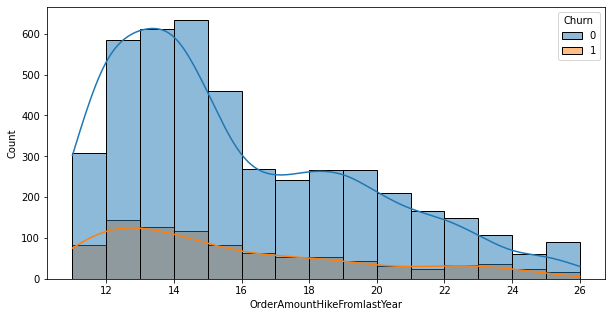

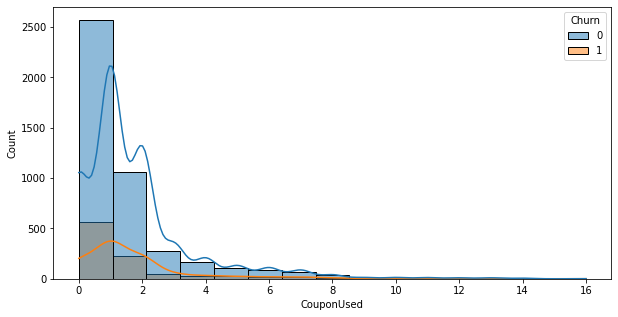

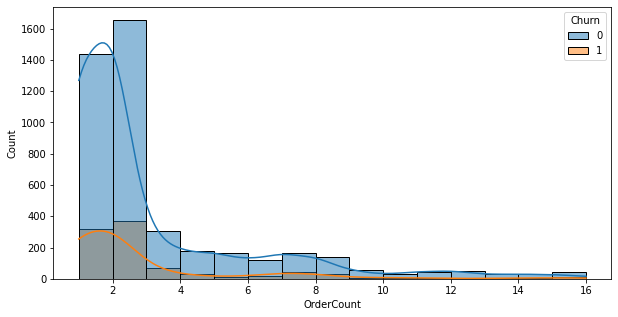

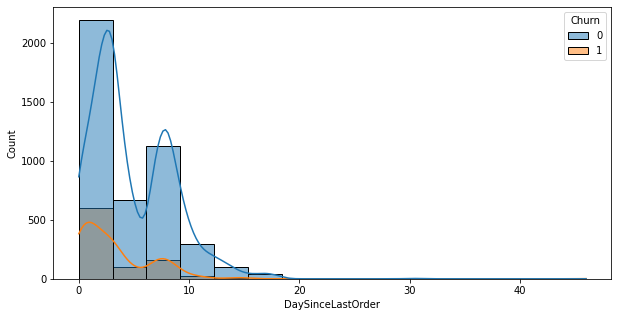

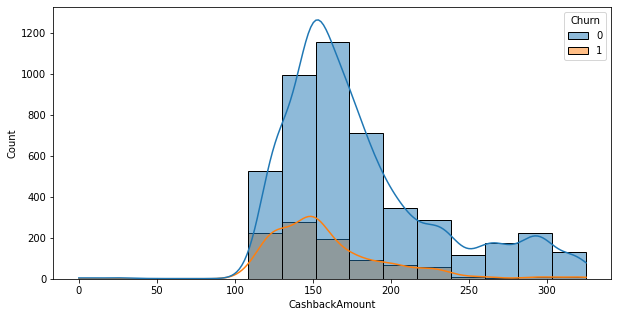

In [18]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=i, kde= True, bins= 15, hue='Churn')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

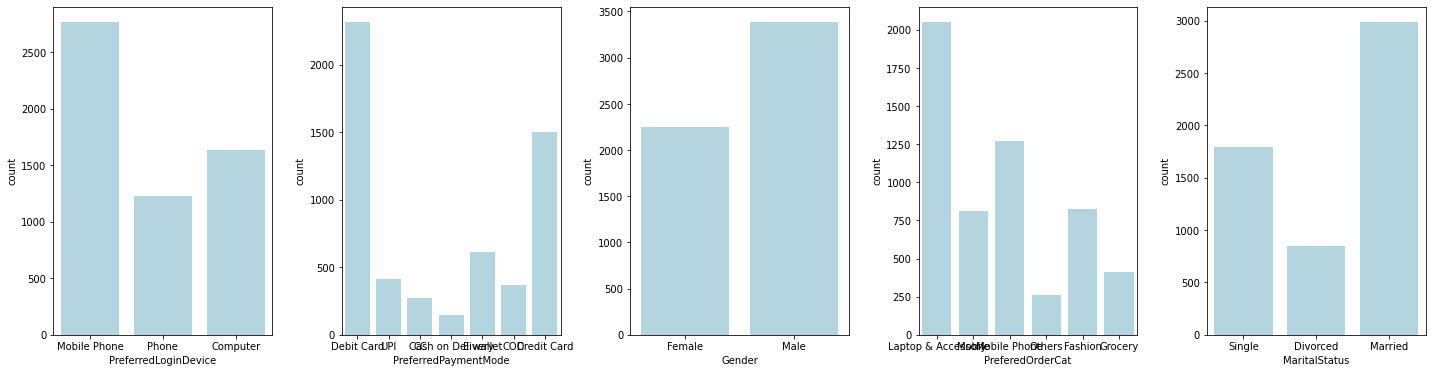

In [20]:
plt.figure(figsize=(20,10))
for i in range(0, len(cats)):
    plt.subplot(2, 5, i+1)
    sns.countplot(df[cats[i]], color='lightblue', orient='h')
    plt.tight_layout()

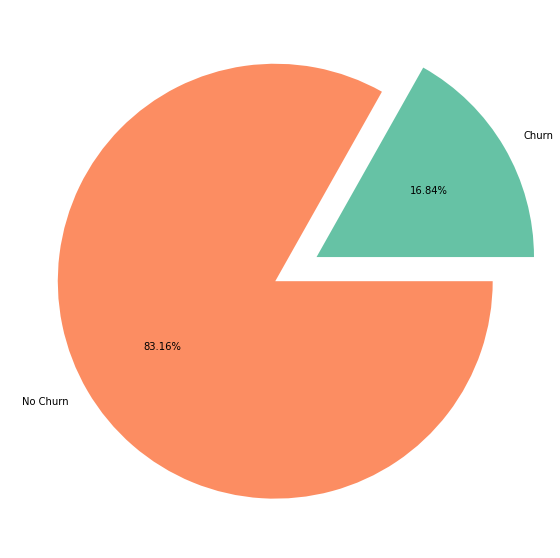

In [21]:
plt.figure(figsize=(10,10))
data = [948, 4682]
explode = [0.2,0.02]
labels = ['Churn', 'No Churn']
colors = sns.color_palette('Set2')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.2f%%', explode = explode)
plt.show()

### Univariate Analysis

1. Terdapat Outliers= `Tenure, WarehouseToHome, HoursSpendOnApp, NumberOfDeviceRegistered, NumberOfAddress, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount`
2. Skewed= Hampir semua skewed positif</br>
3. Untuk Target `Churn` terdapat class imbalance




## 3. Multivariate Analysis

In [22]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


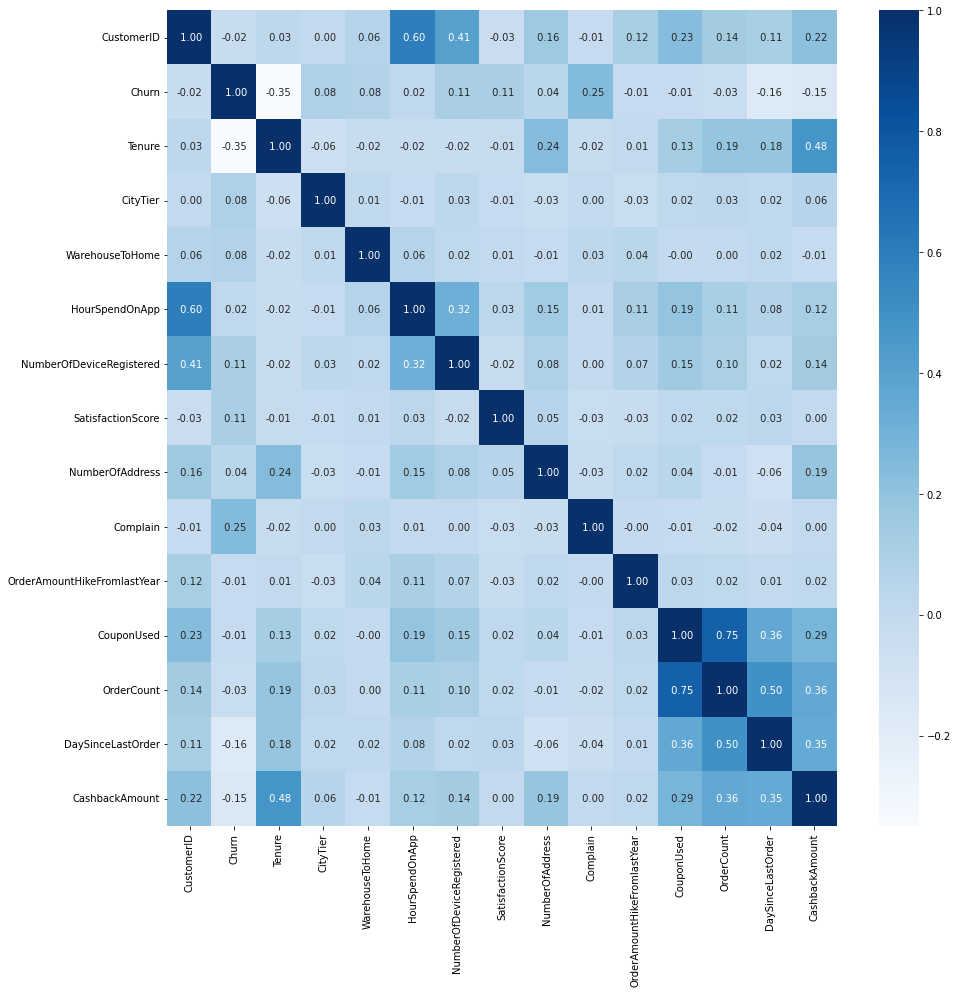

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=' .2f')

### Multivariate Analysis
Beberapa hal dapat diperhatikan dari Heatmap
- `OrderCount` - `CouponUsed` = 0.75
- `Churn` - `Complain` = 0.25 (Semakin tinggi complain semakin besar kemungkinan untuk churn)
- `Churn` - `Tenure` = -0.35 (Semakin rendah Tenure semakin besar kemungkinan untuk Churn)

## EDA Customer yang Churn Saja

In [24]:
dfchurn= df[df.Churn==1]
dfchurn.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4827,54828,1,5.0,Mobile Phone,1,9.0,Debit Card,Female,3.0,6,Mobile Phone,1,Married,6,1,14.0,1.0,2.0,1.0,152.78
935,50936,1,0.0,Computer,1,15.0,CC,Male,2.0,3,Mobile,5,Single,3,1,11.0,0.0,1.0,0.0,131.72
338,50339,1,0.0,Phone,1,NaN,COD,Male,3.0,5,Mobile,2,Single,2,1,18.0,1.0,1.0,0.0,123.40
4284,54285,1,1.0,Mobile Phone,3,13.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Married,6,1,19.0,1.0,8.0,8.0,186.72
2430,52431,1,0.0,Computer,1,9.0,Debit Card,Female,2.0,3,Mobile Phone,3,Single,2,0,12.0,2.0,7.0,7.0,140.84


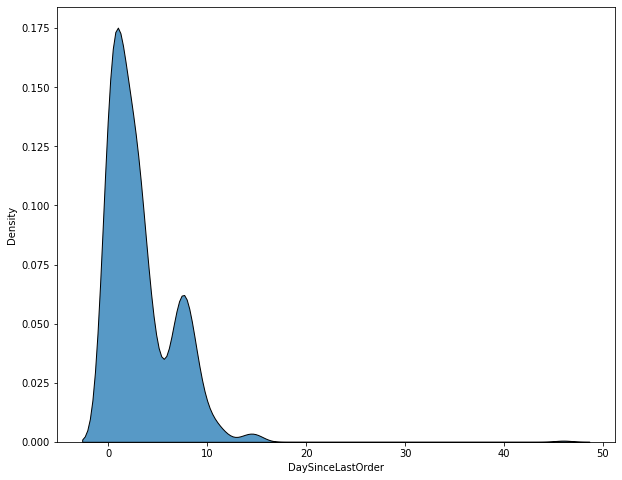

In [25]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=dfchurn, x="DaySinceLastOrder", multiple="stack")

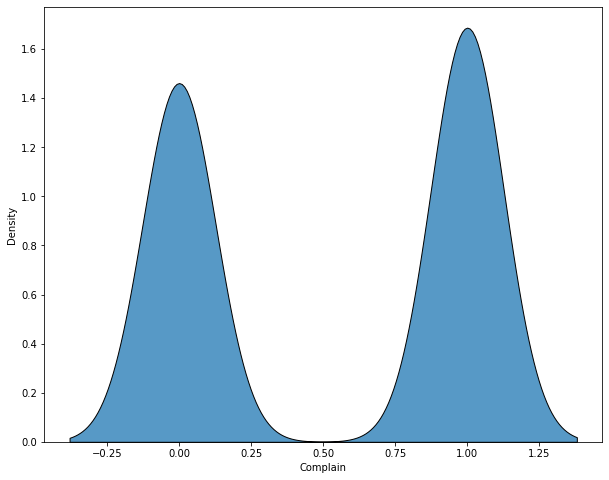

In [26]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=dfchurn, x="Complain", multiple="stack")

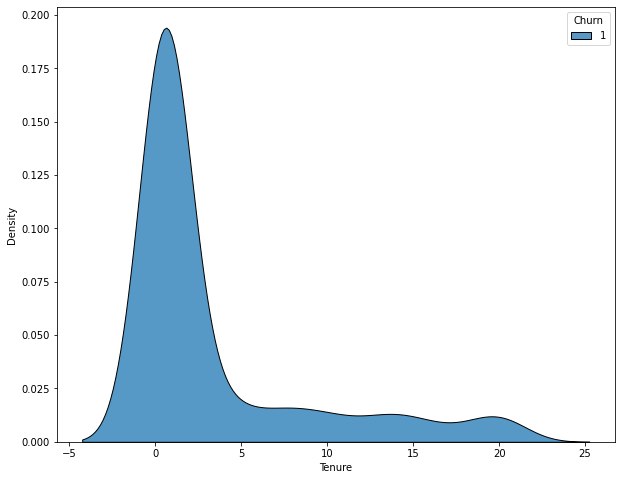

In [27]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=dfchurn, x="Tenure", hue="Churn", multiple="stack")

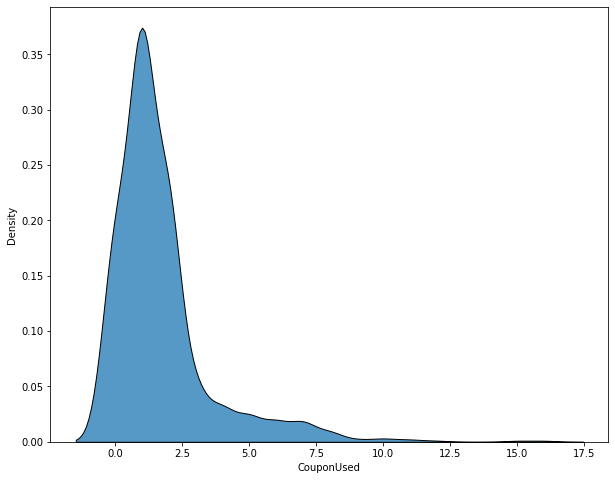

In [34]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=dfchurn, x="CouponUsed", multiple="stack")

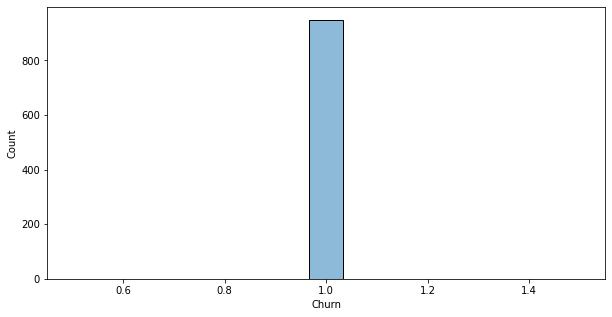

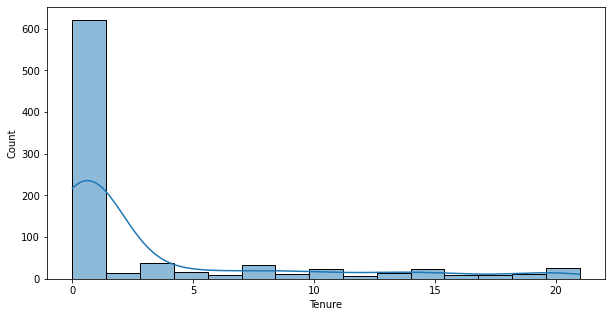

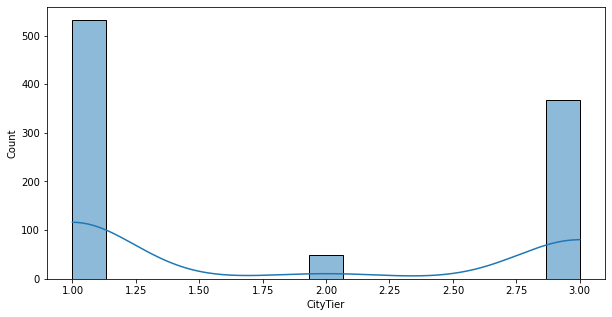

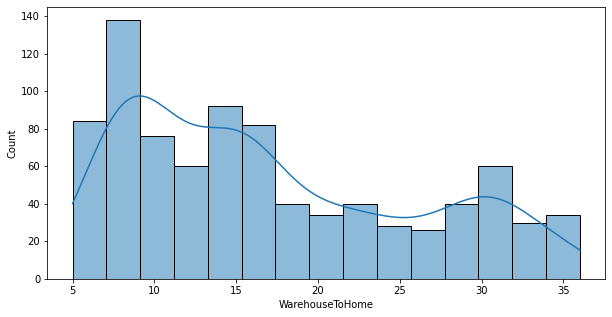

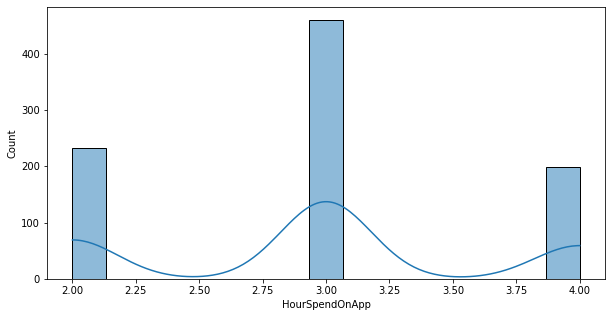

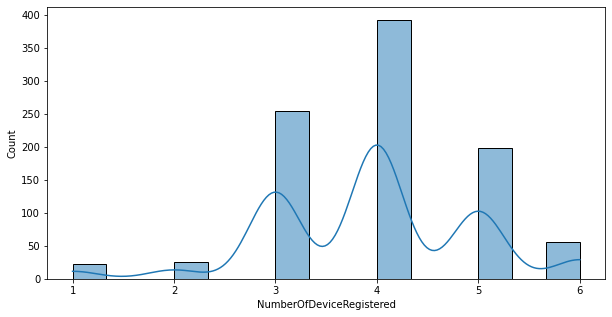

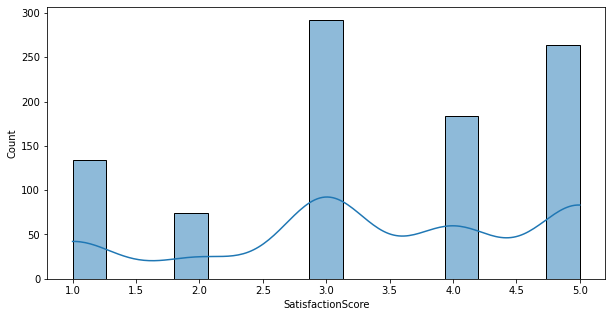

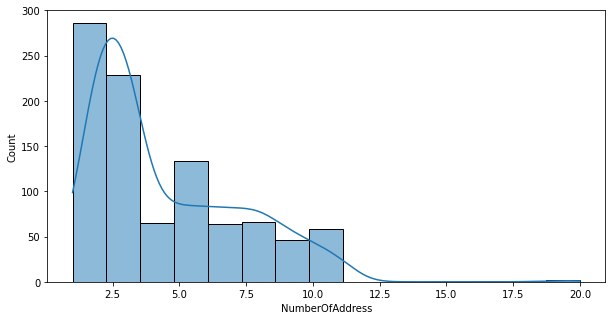

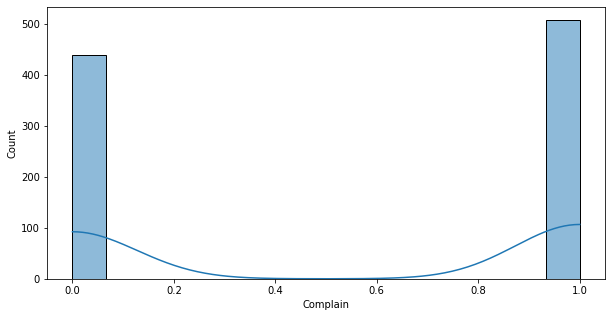

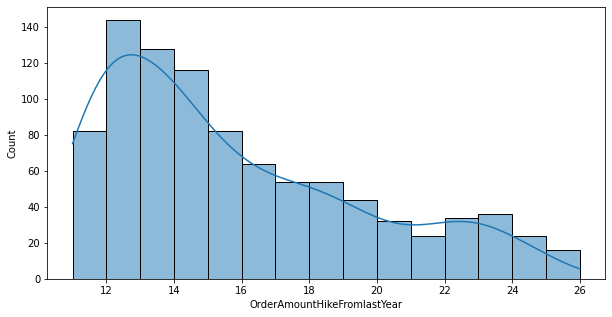

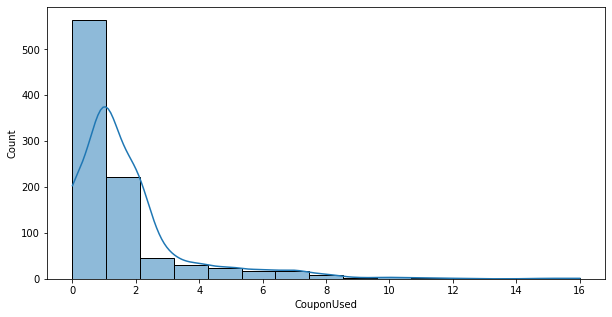

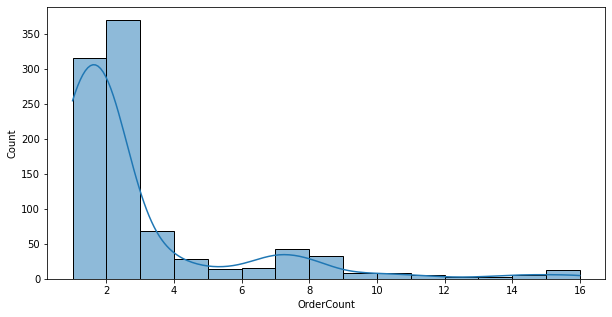

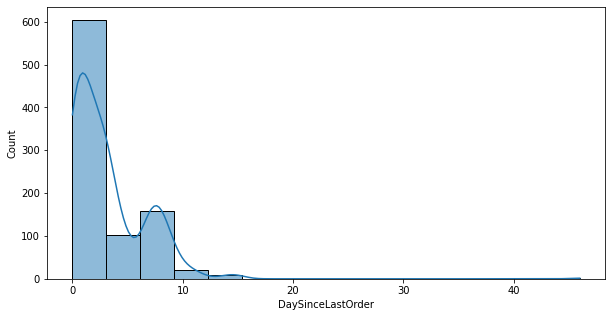

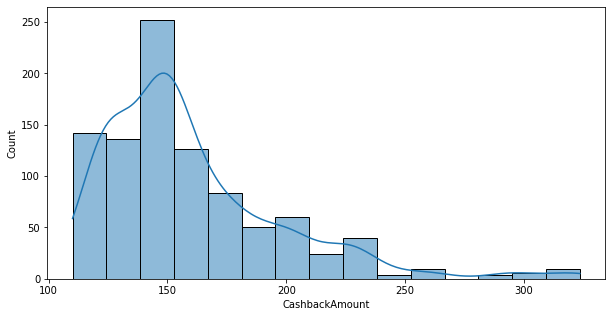

In [28]:
for i in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=dfchurn, x=i, kde= True, bins= 15)
    plt.show()

## Apakah customer yang membuka apps lebih lama cenderung churn?

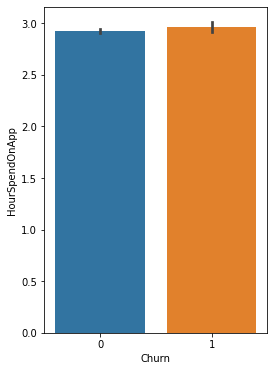

In [29]:
plt.figure(figsize=(4,6))
sns.barplot(y='HourSpendOnApp', x='Churn', data=df)
plt.show()

## Apakah customer yang memiliki tenure yang rendah cenderung churn?

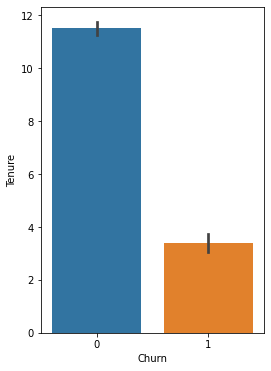

In [31]:
plt.figure(figsize=(4,6))
sns.barplot(y='Tenure', x='Churn', data=df)
plt.show()

## Apakah customer yang memiliki complain cenderung churn?

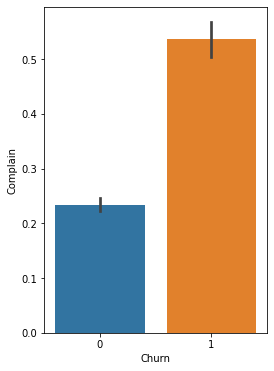

In [32]:
plt.figure(figsize=(4,6))
sns.barplot(y='Complain', x='Churn', data=df)
plt.show()

## Apakah status pernikahan customer mempengaruhi churn?

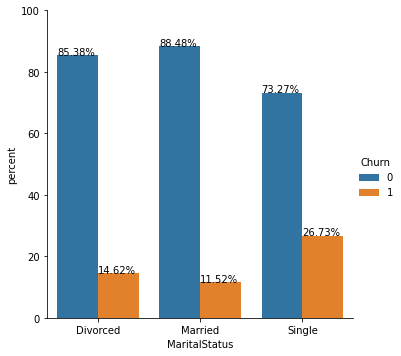

In [33]:
x,y = 'MaritalStatus', 'Churn'

df2 = df.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()

g = sns.catplot(x=x, y='percent',hue=y, kind='bar', data=df2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# 4. Business Insight

Setelah melakukan analisis diatas dapat ditarik beberapa insight:
1. Customer dengan **Tenure** rendah memiliki kecenderungan untuk **Churn** lebih tinggi
2. Customer yang pernah melakukan **Complain** lebih banyak memiliki kecenderungan untuk **Churn** lebih tinggi
3. Customer dengan status single memiliki tingkat churn paling tinggi dibandingkan status lainnya